In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing , Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv("./data/gold_monthly.csv")

In [27]:
data.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [28]:
data.shape

(847, 2)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [30]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [31]:
data.duplicated().sum()

np.int64(0)

In [32]:
# Assuming 'data' is your DataFrame and 'Date' column is datetime
print(f"Date Range of Gold Prices available From {data['Date'].iloc[0]} to {data['Date'].iloc[-1]}")


Date Range of Gold Prices available From 1950-01 to 2020-07


In [33]:
date = pd.date_range(start='1/1/1950' , end ='8/1/2020' , freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [34]:
data['month'] = date 
data.drop('Date' , axis =1 , inplace = True)
data = data.set_index('month')
data.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


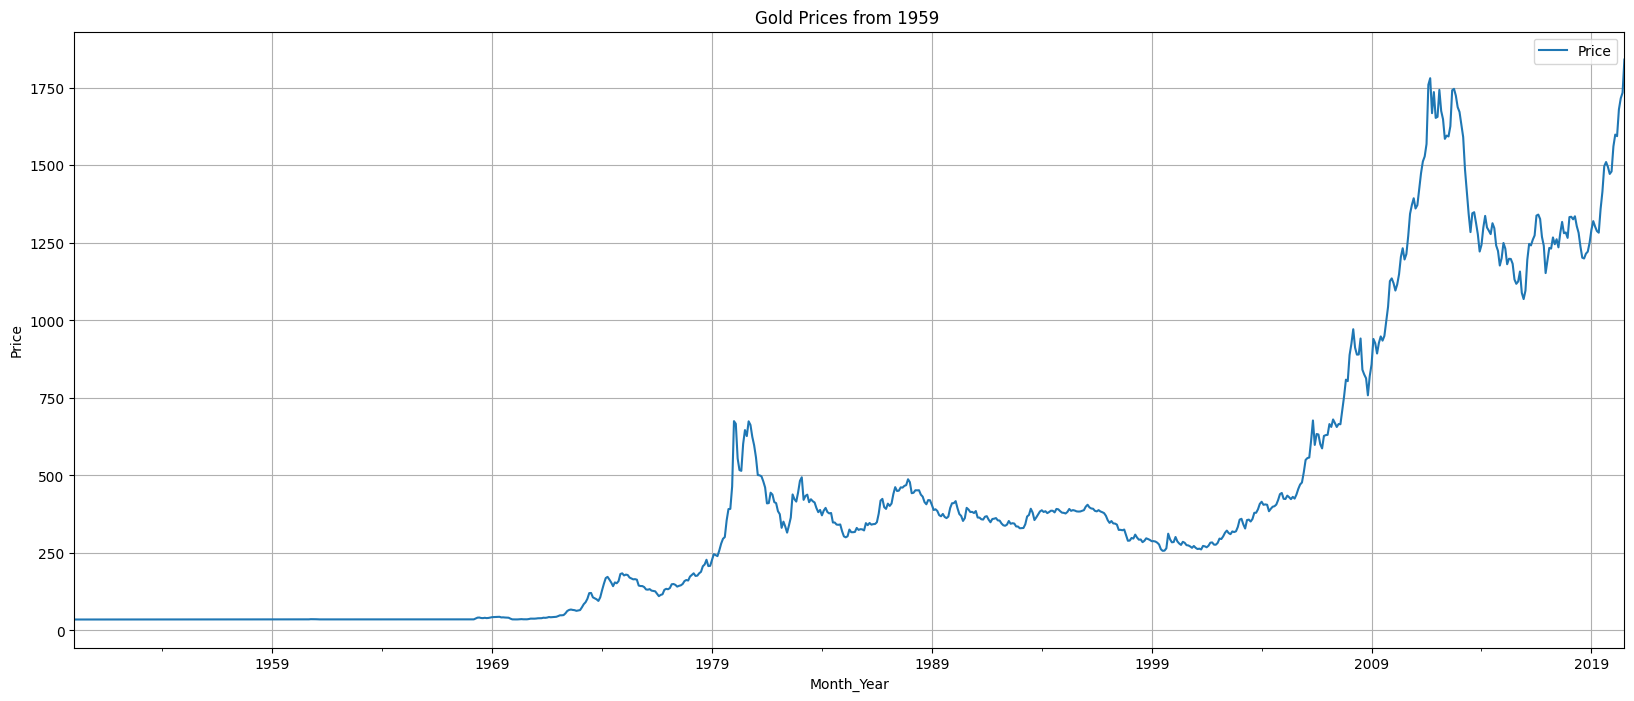

In [41]:
data.plot(figsize=(20, 8) )
plt.title('Gold Prices from 1959 ')
plt.xlabel('Month_Year')
plt.ylabel('Price')
plt.grid()
plt.show()


In [42]:
data.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


<Axes: ylabel='Price'>

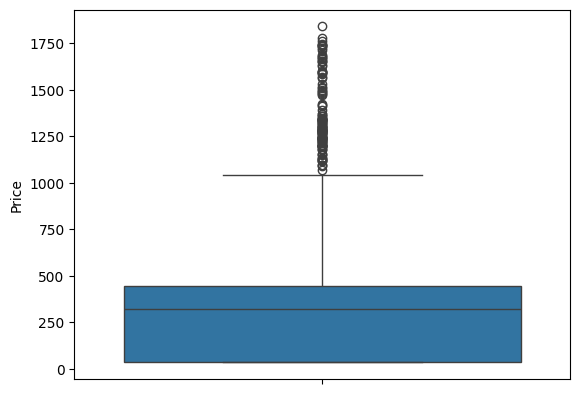

In [44]:
sns.boxplot(data= data['Price'])

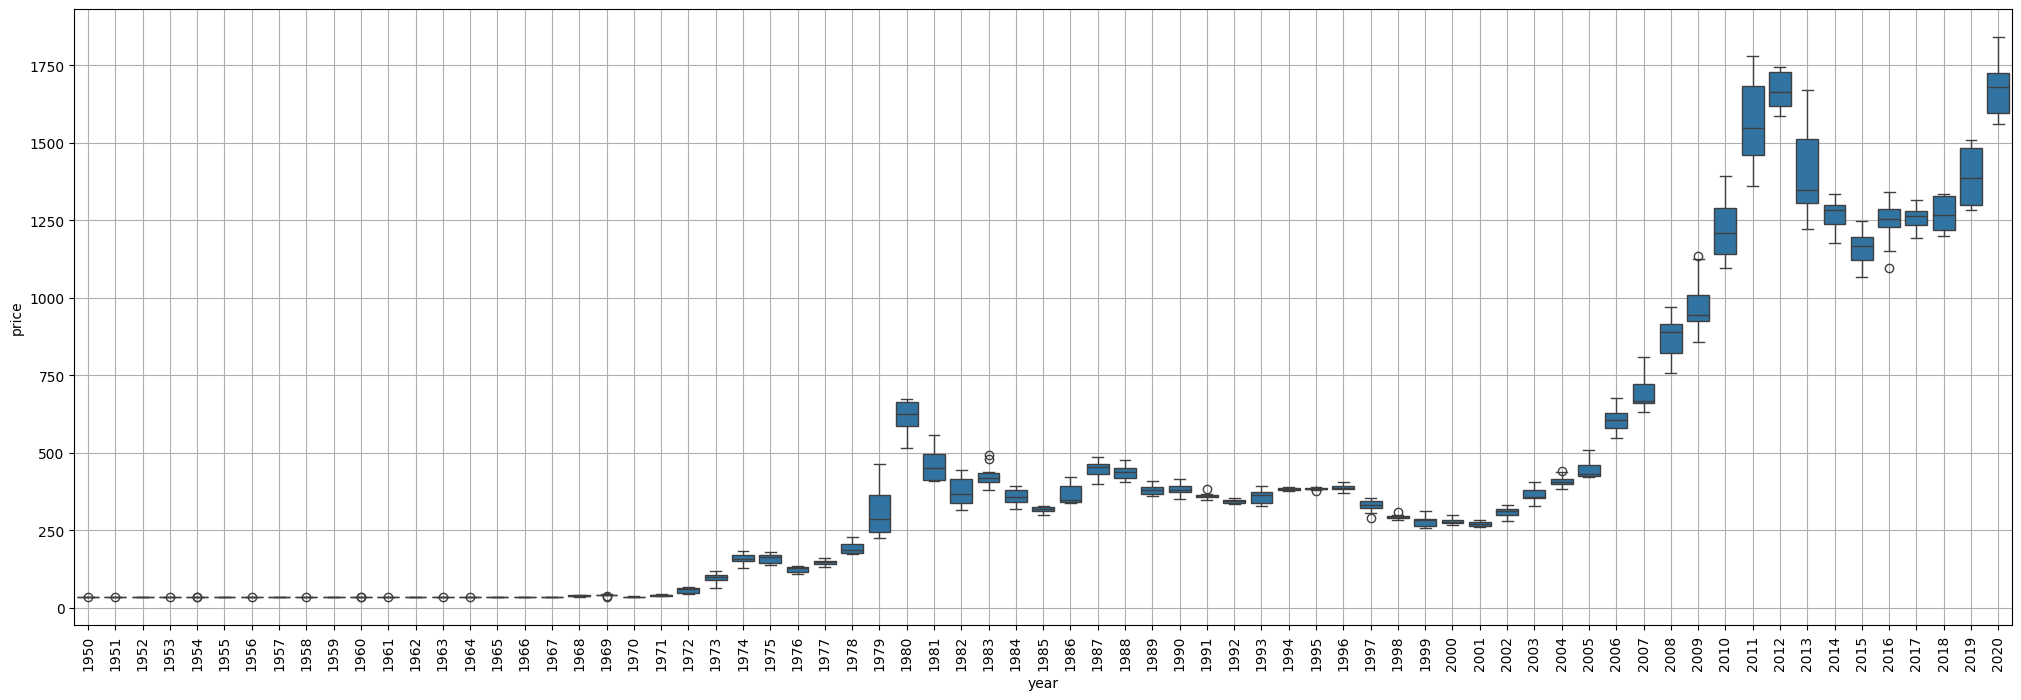

In [45]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x= data.index.year , y= data.values[:,0] , ax= ax)
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

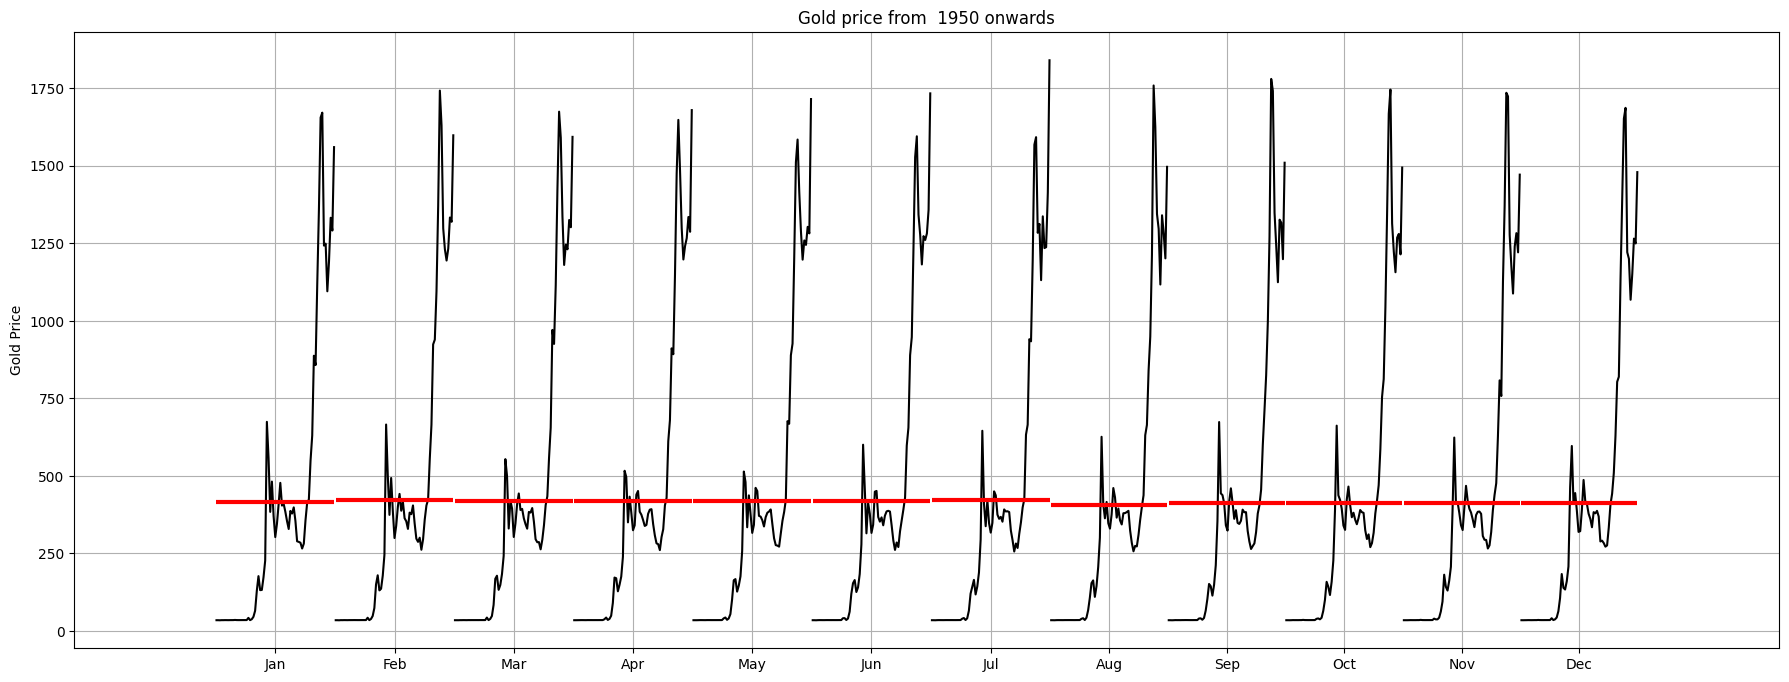

In [47]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(data , ylabel='Gold Price' , ax = ax)
plt.title('Gold price from  1950 onwards')
plt.grid()

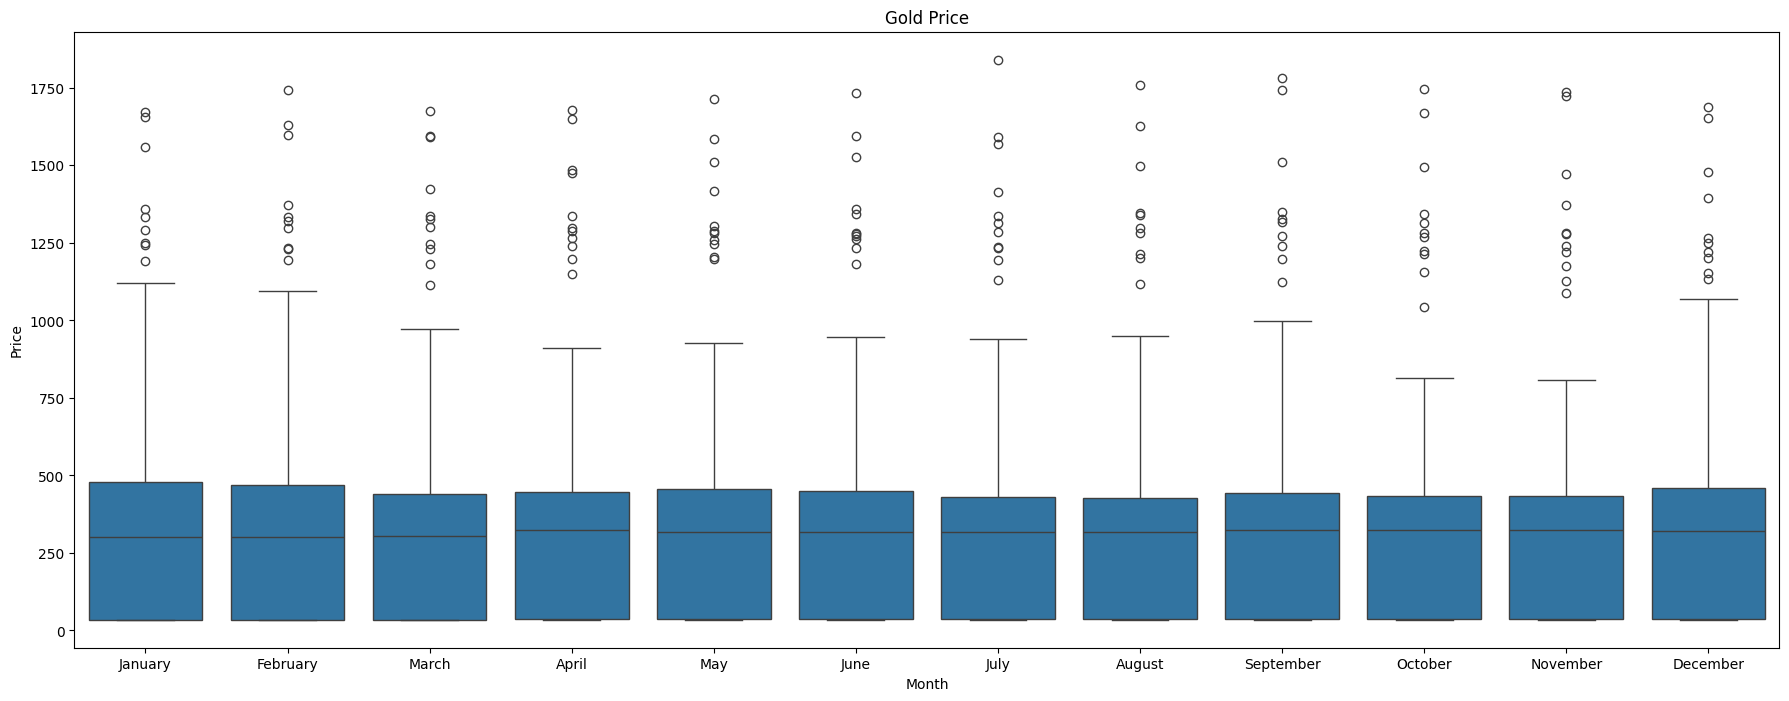

In [52]:
fig, ax = plt.subplots(figsize=(22, 8))  # Corrected plt.subplot to plt.subplots

sns.boxplot(
    x=data.index.month_name(),  # Use month names from the index
    y=data.values[:, 0],       # Use the first column of the data
    ax=ax                      # Pass the axes
)

# Set plot labels and title
plt.title('Gold Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


Text(0.5, 1.0, 'AVG Gold price Yearly ')

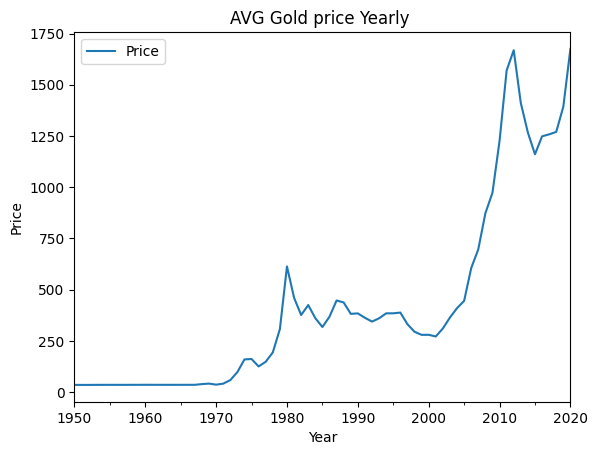

In [58]:
data_yearly_sum = data.resample('A').mean()
data_yearly_sum.plot()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('AVG Gold price Yearly ')



Text(0.5, 1.0, 'AVG Gold price Quaterly ')

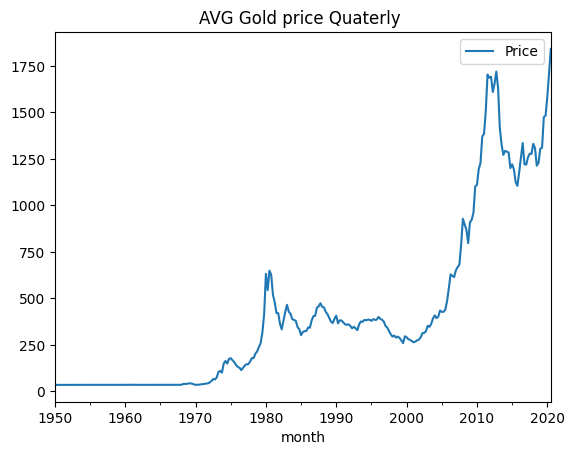

In [57]:
data_quaterly_sum = data.resample('Q').mean()
data_quaterly_sum.plot()
plt.title('AVG Gold price Quaterly ')
plt.grid()

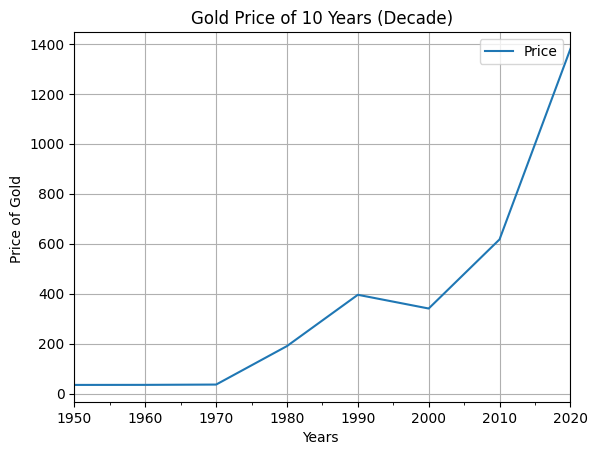

In [64]:
data_10_year = data.resample('10Y').mean()
data_10_year.plot()
plt.title('Gold Price of 10 Years (Decade)')
plt.xlabel('Years ')
plt.ylabel("Price of Gold ")
plt.grid()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 1950-01-31 to 2020-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   847 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB


In [67]:
data1 = data.groupby(data.index.year).mean().rename(columns={'Price':'Mean'})
data1 = data1.merge(data.groupby(data.index.year).std().rename(columns={'Price':'Std'}), left_index=True , right_index = True)
data1['Cov_pct'] = ((data1['Std']/data1["Mean"]) * 100).round(2)
data1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


Text(0.5, 1.0, 'Avf Gold Price Yearly')

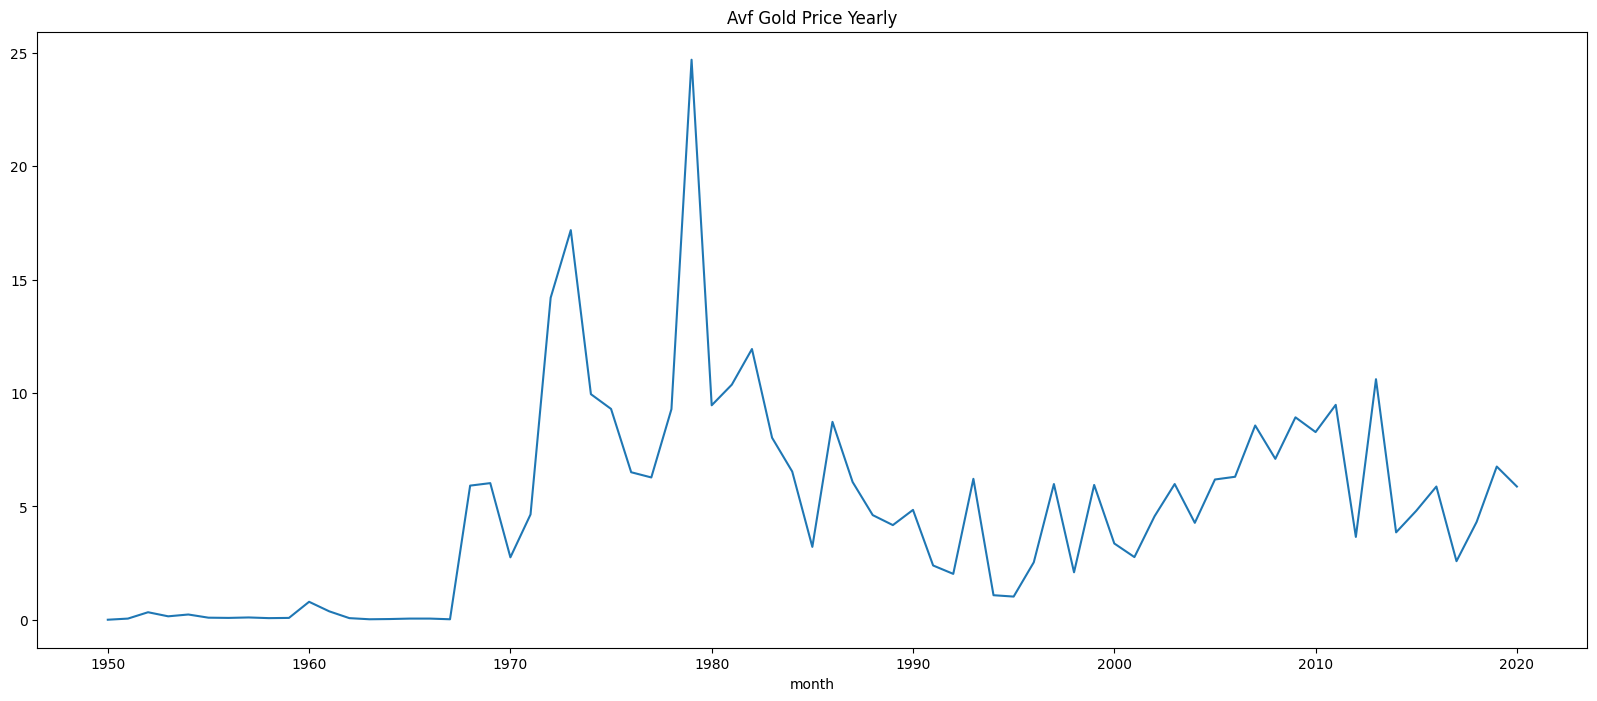

In [70]:
fig , ax = plt.subplots(figsize=(20, 8))
data1['Cov_pct'].plot()
plt.title('Avf Gold Price Yearly')


In [71]:
train = data[data.index.year <= 2015]
test = data[data.index.year > 2015]

In [74]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


In [75]:
train.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


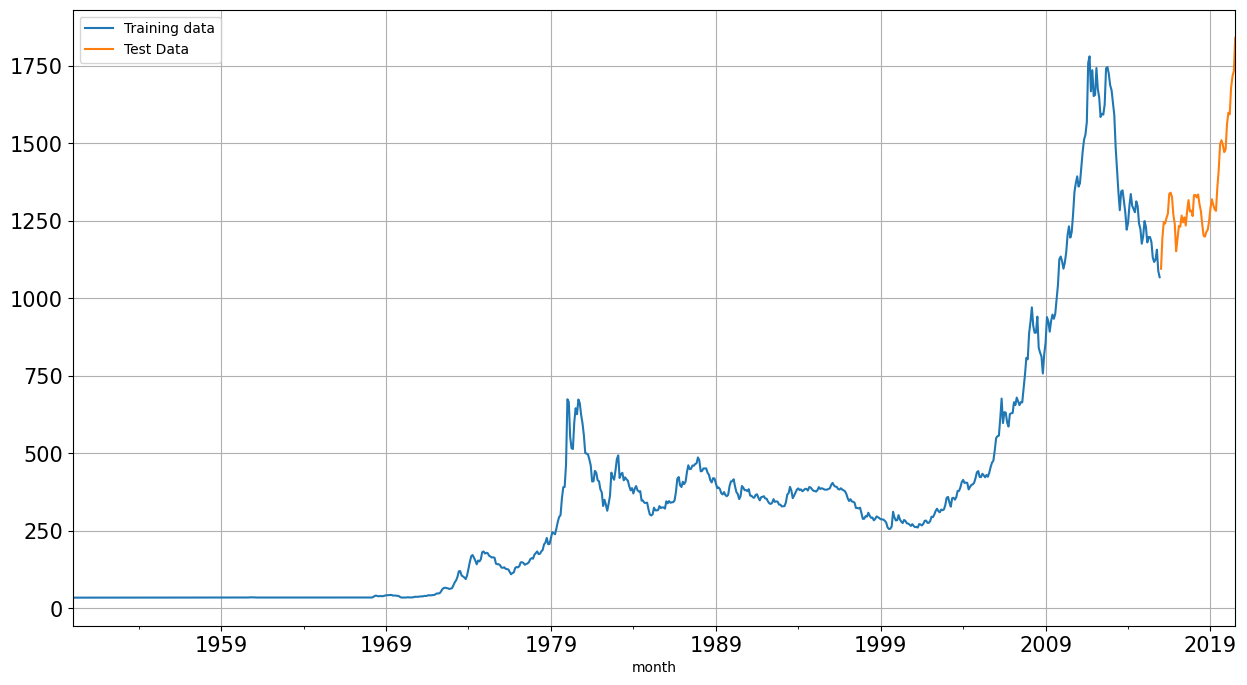

In [78]:
train['Price'].plot(figsize=(15,8) , fontsize = 15)
test['Price'].plot(figsize=(15,8) , fontsize = 15)
plt.grid()
plt.legend(['Training Data' , 'Test Data '])
plt.show()